In [2]:
import pandas as pd
import numpy as np
import json
import math

from tqdm.notebook import tqdm
from scipy.stats import expon
from matplotlib import pyplot as plt


In [3]:
with open('dados.json') as file:
    dados = json.load(file)['dados']

dados = pd.DataFrame(dados)

In [4]:

media = np.mean(dados['por dia'])
precisao_x = 1
delta_x = 10 ** (-1 * precisao_x)
x_max = np.max(dados['por dia'])
lista_x = list()
for x in np.arange(0, x_max, delta_x): lista_x.append(round(x, precisao_x))
    
valor_expon = list()
for x in lista_x:
    valor = expon.pdf(x, scale=media)
    valor_expon.append(valor)


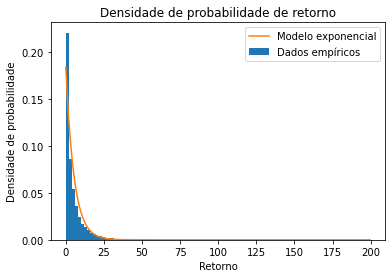

In [5]:
plt.hist(dados['por dia'], bins=100, density=True)
plt.plot(lista_x, valor_expon)
plt.title('Densidade de probabilidade de retorno')
plt.legend(['Modelo exponencial', 'Dados empíricos'])
plt.xlabel('Retorno')
plt.ylabel('Densidade de probabilidade')
plt.show()


[0.01316702 3.64240293]


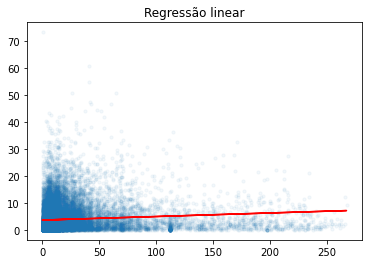

In [6]:
dados = dados.loc[:, ['hotspots proximos', 'por dia']]

filtro = pd.notnull(dados['hotspots proximos'])
dados = dados.loc[filtro, :]

filtro = pd.notnull(dados['por dia'])
dados = dados.loc[filtro, :]

split_qtde = round(len(dados) / 10 * 8)

dados_x_treinamento = np.array(dados['hotspots proximos'])[:split_qtde]
dados_y_treinamento = np.array(dados['por dia'])[:split_qtde]
dados_x_validacao = np.array(dados['hotspots proximos'])[split_qtde:]
dados_y_validacao = np.array(dados['por dia'])[split_qtde:]

plt.scatter(dados_x_treinamento, dados_y_treinamento, alpha=.05, s=10)

betas = np.polyfit(dados_x_treinamento, dados_y_treinamento, 1)
trend = np.poly1d(betas)
plt.plot(dados_x_treinamento, trend(dados_x_treinamento), 'r')

plt.title('Regressão linear')

print(betas)

plt.show()

In [7]:
def trend_line(x): return betas[0] * x + betas[1]


In [10]:
dados_y_validacao_teoricos = list()
diferencas = list()
indice = 0
for x in dados_x_validacao:
    valor_teorico = trend_line(x)
    dados_y_validacao_teoricos.append(valor_teorico)
    diferencas.append(valor_teorico - dados_y_validacao[indice])
    indice += 1
    

0.13161685994773692

In [11]:
#Corr retorno médio diário

pd.Series(dados_y_validacao_teoricos).corr(pd.Series(dados_y_validacao))

0.13161685994773692

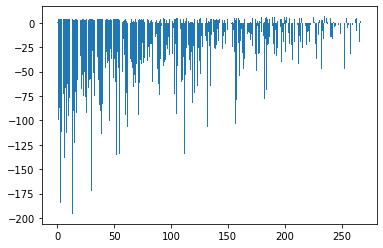

In [16]:
plt.bar(dados_x_validacao, diferencas)
plt.show()
